In [5]:
push!(LOAD_PATH, "/home/zhenan/Github/AtomicOpt.jl")
using AtomicOpt
using Plots
using Images
using LinearAlgebra
using SparseArrays
using FFTW
using LinearMaps

## Load data

In [6]:
xs = Vector{Float64}()
xd = Vector{Float64}()
b = Vector{Float64}()
m = 0
n = 0
ks = 0
kd = 0
lines = readlines("./StarGalaxyData.txt", keep=true)
for line in lines
    info = split(line)
    if length(info) ≥ 1
        if info[1] == "xs"
            for s in info[3:end]
                push!(xs, parse(Float64, s))
            end
        elseif info[1] == "xd"
            for s in info[3:end]
                push!(xd, parse(Float64, s))
            end
        elseif info[1] == "b"
            for s in info[3:end]
                push!(b, parse(Float64, s))
            end
        elseif info[1] == "ks"
            ks = parse(Int64, info[3])
        elseif info[1] == "kd"
            kd = parse(Int64, info[3])
        elseif info[1] == "m"
            m = parse(Int64, info[3])
        elseif info[1] == "n"
            n = parse(Int64, info[3])
        end
    end
end

## Construct atomic sets

In [7]:
τs = gauge(OneBall(n*m), xs)
As = τs*OneBall(n*m; maxrank = ks)
τd = gauge(OneBall(n*m), dct(xd))
Q = LinearMap(p->idct(p), q->dct(q), n*m, n*m)
Ad = τd*Q*OneBall(n*m; maxrank = kd)
A = As + Ad

atomic set  : Sum of atomic sets
description : A₁ + A₂ + ⋯
parameters  : 2 sets; n = 361201

## Solve demixing problem

In [9]:
sol = level_set(I(m*n), b, A, tol = 1e-1, maxIts=5000)


  -------------------------------------------------------------------------
  Polar Level Set Method
  -------------------------------------------------------------------------
  number of variables     361201         number of constraints  361201
  feasibility tolerance  9.78e+00         α                    0.00e+00
  max iterations            5000 
  -------------------------------------------------------------------------
  Major      Minor        u-α        ℓ-α        gap          τ         infeas-α  Subproblem
      1          1   1.38e+04   9.16e+03   4.69e+03   4.86e-02       4.69e+03   suboptimal
      2          4   2.18e+03   6.56e+02   1.53e+03   6.70e-02       4.69e+03   suboptimal
      3          3   1.75e+03   3.10e+02   1.44e+03   8.25e-02       4.69e+03   suboptimal
      4          2   1.57e+03   6.04e+02   9.70e+02   9.16e-02       4.69e+03   suboptimal
      5          7   1.29e+03   3.03e+02   9.83e+02   1.18e-01       4.69e+03   suboptimal
      6          9   1

Solution{AbstractFace, Vector{Float64}, Float64}(face of atomic set  : Face of the sum of atomic sets
parameters          : rank = (30125, 15877); n = 361201, face of atomic set  : Face of the sum of atomic sets
parameters          : rank = (30125, 15877); n = 361201, [0.00013475861250117693, 0.00012439457595425155, 0.00013088476910866784, 0.00014967811399138183, 0.00010104047155389841, 0.00013593023491905042, 9.623067858627341e-5, 6.28381542094758e-5, 0.00011646096705442241, 0.00013807487049384448  …  5.210866994335384e-6, 1.719957071639271e-6, -2.6536822689284592e-6, -1.1773097385040089e-6, -6.162354347118536e-6, 1.8658233779734408e-5, -9.932015858290415e-6, 1.2785253290594947e-5, -2.9582345420486725e-7, 4.322241957760216e-5], [0.00013475861250117693, 0.00012439457595425155, 0.00013088476910866784, 0.00014967811399138183, 0.00010104047155389841, 0.00013593023491905042, 9.623067858627341e-5, 6.28381542094758e-5, 0.00011646096705442241, 0.00013807487049384448  …  5.210866994335384e-6, 

## Plot

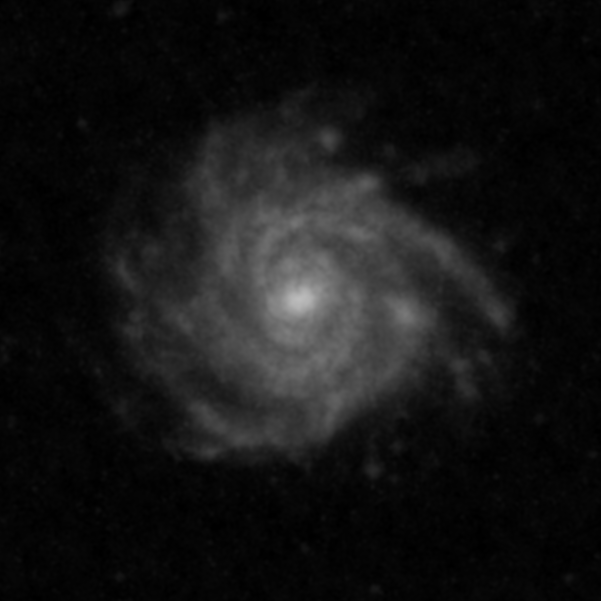

In [11]:
x = constructPrimal(sol)
colorview(Gray, reshape(x[1], m, n))
colorview(Gray, reshape(x[2], m, n))

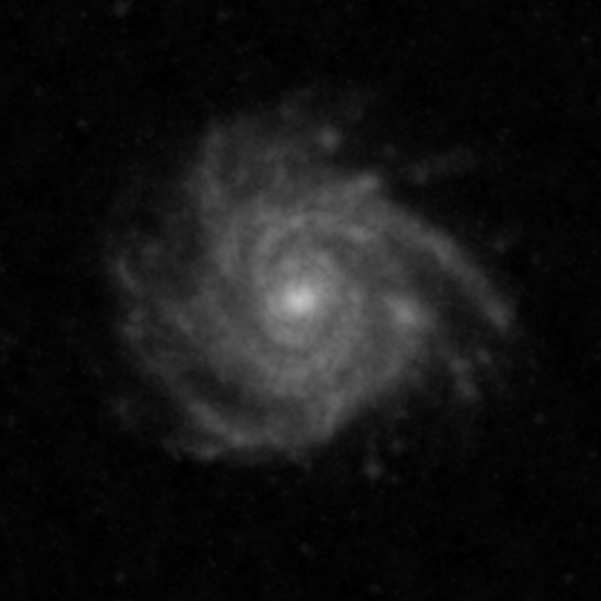

In [20]:
x2 = sol.F.faces[2] * sol.c[ks+1:end]
colorview(Gray, reshape(x2, m, n))